In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('cleaned_superstore.csv', header=None, on_bad_lines='skip')
df.head()

In [ ]:
df.columns = [
    'Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
    'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City',
    'State', 'Postal_Code', 'Region', 'Product_ID', 'Category',
    'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'
]

In [ ]:
# Convert dates
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], errors='coerce')

# Convert numeric columns
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9686 non-null   int64         
 1   Order_ID       9686 non-null   object        
 2   Order_Date     3910 non-null   datetime64[ns]
 3   Ship_Date      3787 non-null   datetime64[ns]
 4   Ship_Mode      9686 non-null   object        
 5   Customer_ID    9686 non-null   object        
 6   Customer_Name  9686 non-null   object        
 7   Segment        9686 non-null   object        
 8   Country        9686 non-null   object        
 9   City           9686 non-null   object        
 10  State          9686 non-null   object        
 11  Postal_Code    9686 non-null   int64         
 12  Region         9686 non-null   object        
 13  Product_ID     9686 non-null   object        
 14  Category       9686 non-null   object        
 15  Sub_Category   9686 n

,0
Row_ID,0
Order_ID,0
Order_Date,5776
Ship_Date,5899
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [ ]:
df = df.dropna(subset=['Order_Date', 'Ship_Date'])

In [ ]:
df['Profit'].fillna(0, inplace=True)

/tmp/ipython-input-1321417567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profit'].fillna(0, inplace=True)


In [ ]:
df.isnull().sum()

,0
Row_ID,0
Order_ID,0
Order_Date,0
Ship_Date,0
Ship_Mode,0
Customer_ID,0
Customer_Name,0
Segment,0
Country,0
City,0


In [ ]:
df.to_csv('superstore_final_clean.csv', index=False)

In [ ]:
print(df.shape)
df.head()
df['Order_Date'].min(), df['Order_Date'].max()

(2653, 21)


(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-11 00:00:00'))

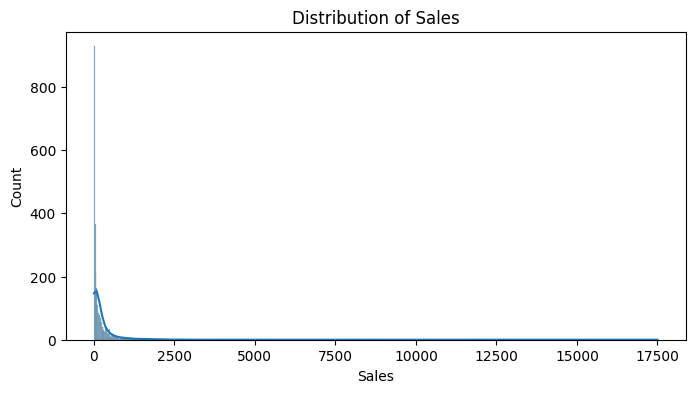

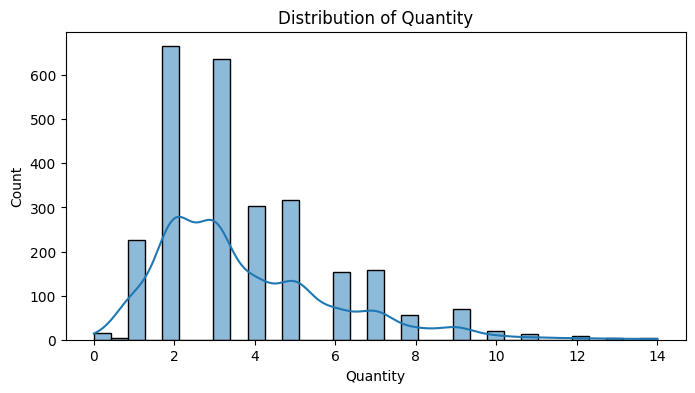

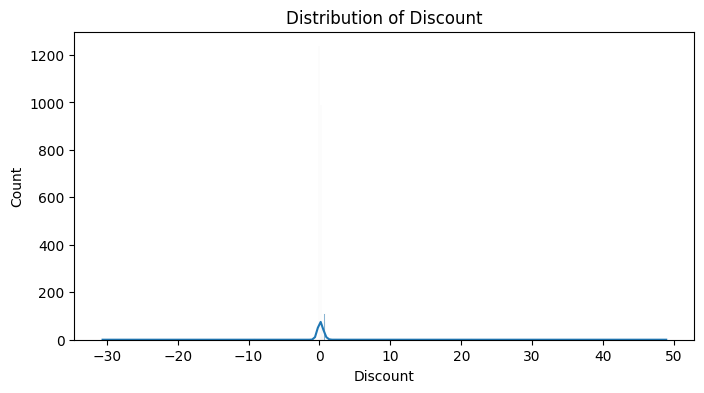

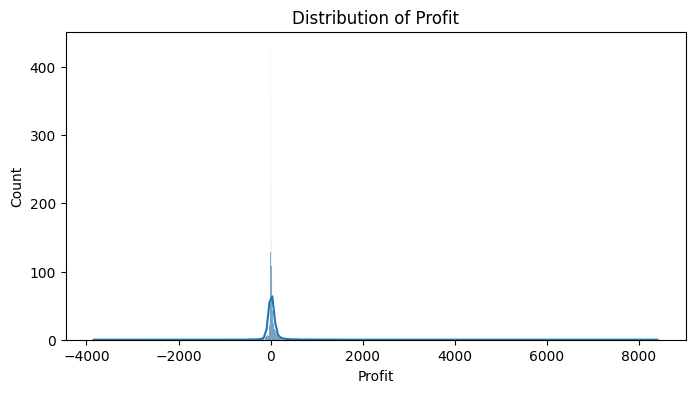

In [ ]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

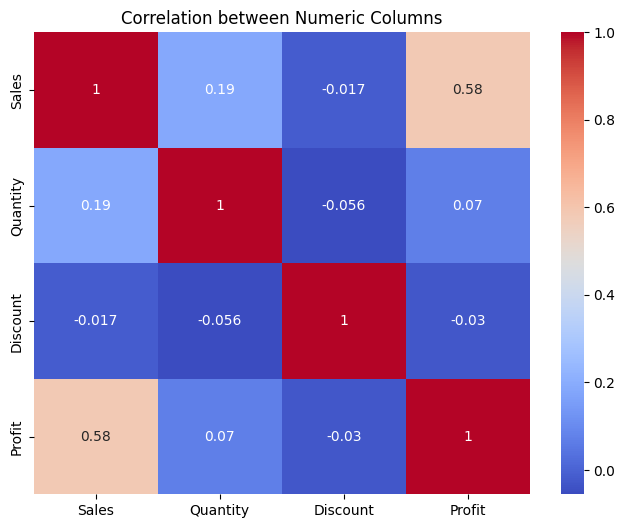

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Columns')
plt.show()

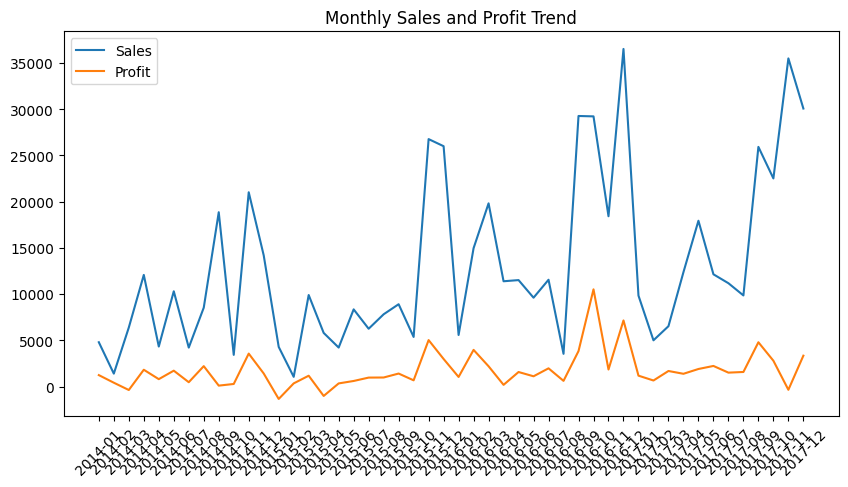

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order_Date'].astype(str), monthly_sales['Sales'], label='Sales')
plt.plot(monthly_sales['Order_Date'].astype(str), monthly_sales['Profit'], label='Profit')
plt.legend()
plt.title('Monthly Sales and Profit Trend')
plt.xticks(rotation=45)
plt.show()

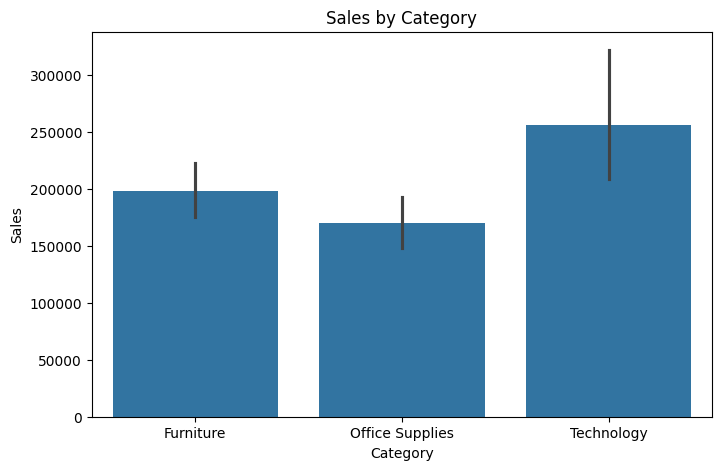

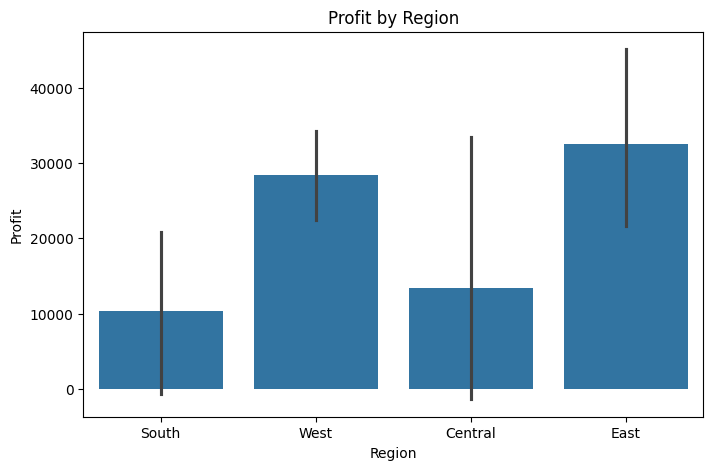

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum)
plt.title('Sales by Category')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Region', y='Profit', estimator=sum)
plt.title('Profit by Region')
plt.show()

In [ ]:
df.to_csv('superstore_cleaned_for_dashboard.csv', index=False)

NameError: name 'df' is not defined